### Internal State

The internal state of the router comprises the translation vector and the matrix. The state should be gradually variable, so that varying the state does not result in jumps in the output.

The translation vector can be randomly chosen at the inititialization time and fixed from then on.

The matrix should be periodically regenerated, and the next matrix should be closely related to the previous matrix. The elements of the matrix should be in the range $[-2; 2]$. A parameterized function that always yields values within a certain range is necessary.

A simple example of such a function is the sine function:
\begin{equation}
x = a \cdot sin{(f t + \phi)} + c
\end{equation}

Since the range is symmetrical with respect to $0$, the constant $c$ is $0$.

$a$ is the scaling factor controlling the output range. It should be set to $2$.

Each row of coefficients can be picked as samples from a section of a sine wave one period long.
The equation for the elements of a row is:

\begin{equation}
p_{i} = 2 \cdot sin{((i - 1) \frac{2 \pi}{n} + \phi)}
\end{equation}

$n$ is the number of coefficients, which is the number of inputs. $i$ is the index of the element in the row, in the range $[1; n]$.

This way there is one peak and one valley per row, that is per output channel. This translates to one input channel being the dominant control, and another input channel being its opposite.

The phase $\phi$ is the variable parameter of the permutation. As it changes, the row of coefficients slightly shifts along the sine wave, but never changes abruptly. Initial phases per row can be randomly chosen at initialization time, just like the translation vector.

$\phi$ is gradually incremented. The rate of change of $\phi$ is the rate of the state generator mentioned in the section on high-level structure. The precise value can be user-controlled, but the full cycle (change of $\phi$ by $2\pi$ radians) should take several minutes, so that the fact that the state is periodic is not obvious to the user.

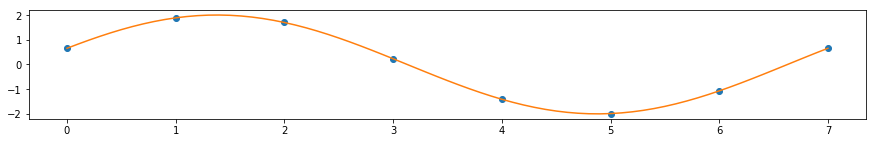

In [12]:
import matplotlib.pyplot as plt
import numpy as np

PHI = .333

def coefficient(index, n):
    return 2 * np.sin((index * 2 * np.pi) / (n - 1) + PHI)

N = 8 # number of coefficients

x = np.arange(0, N, 1)
samples = np.array([coefficient(xi, N) for xi in x])

ref_x = np.arange(0, N - 0.9, 0.1)
ref_y = np.array([coefficient(xi, N) for xi in ref_x])

fig, ax = plt.subplots(figsize=(15, 2))
ax.plot(x, samples, 'o', ref_x, ref_y, '-')
plt.show()

There is one more consideration. With the coefficients sampled a sine wave, the user might notice a spatial pattern of the dominant control and the opposite control being $n/2$ knobs apart if there are $n$ inputs. In order to conceal this spatial pattern, one more step is added. After the coefficients are sampled, they are shuffled, so that they appear in the matrix in a different order.

The shuffling can be represented with a shuffling matrix $S$ that has the same dimensions as the permutation matrix. The element of each row of the shuffling matrix $s_{i}$ represents the column in the permutation matrix to which the $i$-th sample from the sine wave will go. So the rows of the permutation matrix are shufflings of numbers from 1 to $n$, where $n$ is the number of coefficients.

In [15]:
import random

indices = [x for x in range(N)]
shuffling = random.sample(indices, len(indices))
    
coefficients = [0 for x in range(N)]
for i in indices:
    coefficients[i] = samples[shuffling[i]]

print("shuffling:")
print("\n".join(["from {0} to {1}".format(i, v) for i, v in enumerate(shuffling)]))
print("\nsamples:")
print(" | ".join(["{:.3f}".format(yi) for yi in samples]))
print("\ncoefficients:")
print(" | ".join(["{:.3f}".format(yi) for yi in coefficients]))

shuffling:
from 0 to 1
from 1 to 5
from 2 to 4
from 3 to 2
from 4 to 0
from 5 to 6
from 6 to 7
from 7 to 3

samples:
0.654 | 1.885 | 1.697 | 0.231 | -1.409 | -1.988 | -1.070 | 0.654

coefficients:
1.885 | -1.988 | -1.409 | 1.697 | 0.654 | -1.070 | 0.654 | 0.231
